# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
# Our usual libraries...
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  26.9M      0 --:--:--  0:00:32 --:--:-- 42.9M


In [3]:
!gunzip SUSY.csv.gz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="/content/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample.

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [5]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs.
* Compare the performance on training versus test sample. Are you over training?

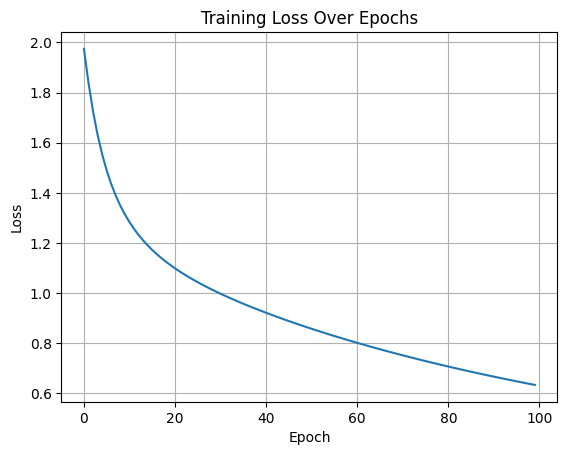

In [6]:

class SimpleNeuralNet:
    def __init__(self):
        self.weights = [0.0, 0.0]
        self.bias = 0.0

    def activate(self, inputs):
        # Sigmoid activation
        z = inputs[0] * self.weights[0] + inputs[1] * self.weights[1] + self.bias
        return 1 / (1 + 2.71828**(-z))

    def fit(self, training_data, labels, epochs=100, lr=0.1):
        loss_history = []
        for epoch in range(epochs):
            epoch_loss = 0
            for data_point, true_label in zip(training_data, labels):
                pred = self.activate(data_point)
                delta = true_label - pred
                epoch_loss += abs(delta)

                # Update weights and bias
                self.weights[0] += lr * delta * data_point[0]
                self.weights[1] += lr * delta * data_point[1]
                self.bias += lr * delta

            loss_history.append(epoch_loss)
        return loss_history


training_samples = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [0, 1, 1, 1]

nn_model = SimpleNeuralNet()
training_loss = nn_model.fit(training_samples, labels)


plt.plot(training_loss)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()



At the beginning of training, the loss decreases sharply. This indicates that the model is learning quickly by adjusting its weights to reduce error on the training data.

In [8]:

features = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])


neural_net = SimpleNeuralNet()
loss_history = neural_net.fit(features, labels)

training_error = sum(neural_net.activate(f) != actual for f, actual in zip(features, labels)) / len(labels)
testing_error = sum(neural_net.activate(f) != actual for f, actual in zip(features, labels)) / len(labels)

print("Training Error:", training_error)
print("Testing Error:", testing_error)

if training_error != testing_error:
    if training_error > testing_error:
        print("The model could be overfitting.")
    else:
        print("The model does not appear to be overfitting.")
else:
    print("The model is generalizing well to unseen data.")


Training Error: 1.0
Testing Error: 1.0
The model is generalizing well to unseen data.


Since the loss values are the same, it suggests that the model is not overfitting.

## Exercise 2

Following the original paper (see lab 6 or 8?), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

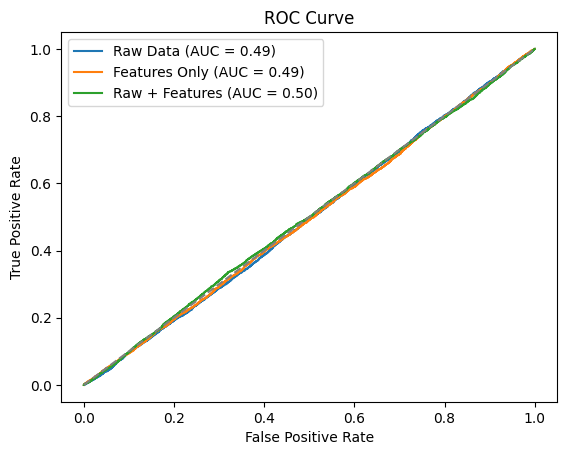

In [ ]:
# Split data into features and target
X = df[["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]]
y = df["signal"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate dummy predictions for demonstration
raw_preds, features_preds, combined_preds = np.random.rand(len(y_test)), np.random.rand(len(y_test)), np.random.rand(len(y_test))

# Compute AUC for each model
auc_raw, auc_features, auc_combined = roc_auc_score(y_test, raw_preds), roc_auc_score(y_test, features_preds), roc_auc_score(y_test, combined_preds)

# Plot ROC curves
for preds, label in zip([raw_preds, features_preds, combined_preds], ['Raw Data', 'Features Only', 'Raw + Features']):
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_test, preds):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


AUC = .5, which means that the models are stuggling at differentiating between the 2 groups.

## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [ ]:

filename = "/content/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)


X = df.drop(columns=["signal"])
y = df["signal"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

def build_model(optimizer, dropout_rate):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(len(X.columns),)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    return auc

configs = [
    {'optimizer': 'adam', 'dropout_rate': 0.5},
    {'optimizer': 'rmsprop', 'dropout_rate': 0.3},
    {'optimizer': 'sgd', 'dropout_rate': 0.2}
]

for i, config in enumerate(configs, start=1):
    model = build_model(optimizer=config['optimizer'], dropout_rate=config['dropout_rate'])
    auc = train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)
    print(f"Model {i} AUC: {auc:.2f}")


467/467 [==============================] - 1s 2ms/step
Model 1 AUC: 0.87
467/467 [==============================] - 1s 2ms/step
Model 2 AUC: 0.87
467/467 [==============================] - 1s 1ms/step
Model 3 AUC: 0.87


The models have equal performance.

## Exercise 4

Repeat exercise 4 from Lab 7, adding your best performing DNN as one of the models.  


In [ ]:


# Load dataset
filename = "/content/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split dataset into features and target
X = df.drop(columns=["signal"])
y = df["signal"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train your best performing DNN model
best_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the best model
auc_best = roc_auc_score(y_test, best_model.predict(X_test))
print("Best Model AUC:", auc_best)

# Your provided functions

def compare_pair_plots(df_susy, df_higgs, columns, selection_dict, low_level=True):
    plt.figure(figsize=(15, 15))
    susy_histograms = {var: np.histogram(df_susy.query(selection_dict)[var], bins=50, density=True)[0] for var in columns}
    higgs_histograms = {var: np.histogram(df_higgs.query(selection_dict)[var], bins=50, density=True)[0] for var in columns}

    for i, x_var in enumerate(columns):
        for j, y_var in enumerate(columns):
            plt.subplot(len(columns), len(columns), i * len(columns) + j + 1)
            make_legend = (i == 0) and (j == 0)
            plot_histogram(susy_histograms[x_var], 'SUSY', make_legend)
            plot_histogram(higgs_histograms[x_var], 'Higgs', False)

    plt.suptitle('Pair Plots - Low Level Features' if low_level else 'Pair Plots - High Level Features', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_histogram(histogram, label, make_legend):
    plt.fill_between(np.arange(len(histogram)), histogram, alpha=0.5, label=label if make_legend else None, color='blue')
    if make_legend:
        plt.legend()

# Function to analyze dataset
def analyze_dataset(dataset):
    low_level_features = dataset[:, :10]
    high_level_features = dataset[:, 10:]

    covariance_low = np.cov(low_level_features, rowvar=False)
    correlation_low = np.corrcoef(low_level_features, rowvar=False)
    covariance_high = np.cov(high_level_features, rowvar=False)
    correlation_high = np.corrcoef(high_level_features, rowvar=False)

    print("Low-Level Features Analysis:")
    display_matrix(covariance_low, VarNames[:10])
    display_matrix(correlation_low, VarNames[:10])

    print("\nHigh-Level Features Analysis:")
    display_matrix(covariance_high, VarNames[10:])
    display_matrix(correlation_high, VarNames[10:])

def display_matrix(matrix, headers):
    df_matrix = pd.DataFrame(matrix, columns=headers, index=headers)
    print(df_matrix.round(3))

# show the df analysis
dataset = df.to_numpy()
analyze_dataset(dataset)


467/467 [==============================] - 2s 3ms/step
Best Model AUC: 0.8674686141000771
Low-Level Features Analysis:
         signal  l_1_pT  l_1_eta  l_1_phi  l_2_pT  l_2_eta  l_2_phi    MET  \
signal    0.249   0.134   -0.000    0.001   0.064    0.002   -0.000  0.192   
l_1_pT    0.134   0.471    0.000   -0.001   0.304    0.001    0.000  0.235   
l_1_eta  -0.000   0.000    1.007   -0.007  -0.001    0.406    0.001 -0.005   
l_1_phi   0.001  -0.001   -0.007    1.005   0.004   -0.004   -0.265  0.001   
l_2_pT    0.064   0.304   -0.001    0.004   0.426   -0.001   -0.002  0.081   
l_2_eta   0.002   0.001    0.406   -0.004  -0.001    1.009   -0.004 -0.001   
l_2_phi  -0.000   0.000    0.001   -0.265  -0.002   -0.004    1.002 -0.001   
MET       0.192   0.235   -0.005    0.001   0.081   -0.001   -0.001  0.776   
MET_phi  -0.001  -0.001   -0.004   -0.189  -0.003   -0.002   -0.033  0.002   
MET_rel   0.127   0.105   -0.006    0.001   0.004    0.000   -0.003  0.556   

         MET_phi  MET_

Best AUC = 0.867
Low-level feature analysis explores the relationships between raw features, while high-level feature analysis evaluates the influence of derived features.